# Problem

Goal: predict the quality of red wine on a scale of 0–10 given a set of features as inputs.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('bmh')
import seaborn as sns
sns.set() # setting seaborn default for plots

from scipy import stats

# Loading the dataset

In [2]:
red = pd.read_csv('winequality-red.csv', delimiter=';')
red.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [3]:
white = pd.read_csv('winequality-white.csv', delimiter=';')
white.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [4]:
wines = pd.concat([red, white]).reset_index(drop=True)

# Exploratory data analysis

In [5]:
wines.shape

(6497, 12)

In [6]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


- there is no missing values

In [7]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [8]:
wines.corr().iloc[:-1,-1:]

# wines.corr()['quality'].drop('quality')

,quality
fixed acidity,-0.076743
volatile acidity,-0.265699
citric acid,0.085532
residual sugar,-0.036980
chlorides,-0.200666
free sulfur dioxide,0.055463
total sulfur dioxide,-0.041385
density,-0.305858
pH,0.019506
sulphates,0.038485


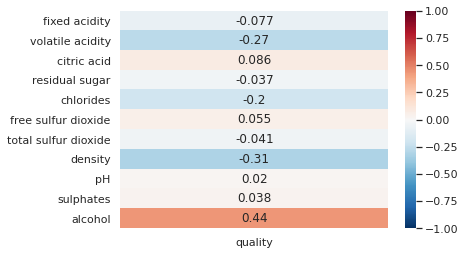

In [9]:
sns.heatmap(wines.corr().iloc[:-1,-1:], cmap="RdBu_r", annot=True, vmax=1, vmin=-1)

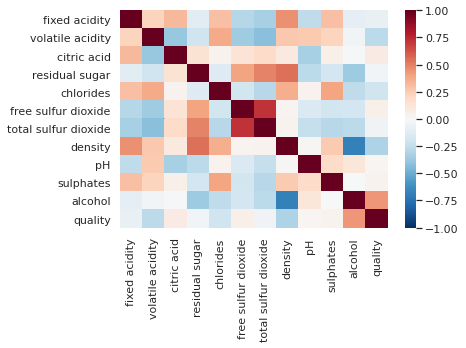

In [10]:
sns.heatmap(wines.corr(), cmap="RdBu_r", vmax=1, vmin=-1)

# Preprocessing data

## Feature Engineering - Selection

removing features that the correlation with `quality` between 0.05 : -0.05. <br>
It is less than 0.05 or greater than -0.05.

In [11]:
(wines.corr()['quality'] > 0.05) | (wines.corr()['quality'] < -0.05)

fixed acidity            True
volatile acidity         True
citric acid              True
residual sugar          False
chlorides                True
free sulfur dioxide      True
total sulfur dioxide    False
density                  True
pH                      False
sulphates               False
alcohol                  True
quality                  True
Name: quality, dtype: bool

In [12]:
columns_selection = wines.columns[((wines.corr()['quality'] > 0.05) 
                                   | (wines.corr()['quality'] < -0.05))]

In [13]:
wines = wines[columns_selection]
wines.head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,density,alcohol,quality
0,7.4,0.70,0.00,0.076,11.0,0.9978,9.4,5
1,7.8,0.88,0.00,0.098,25.0,0.9968,9.8,5
2,7.8,0.76,0.04,0.092,15.0,0.9970,9.8,5
3,11.2,0.28,0.56,0.075,17.0,0.9980,9.8,6
4,7.4,0.70,0.00,0.076,11.0,0.9978,9.4,5


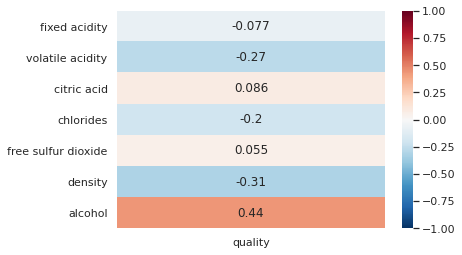

In [14]:
sns.heatmap(wines.corr().iloc[:-1,-1:], cmap="RdBu_r", annot=True, vmax=1, vmin=-1)

## Handling outliers

- finding

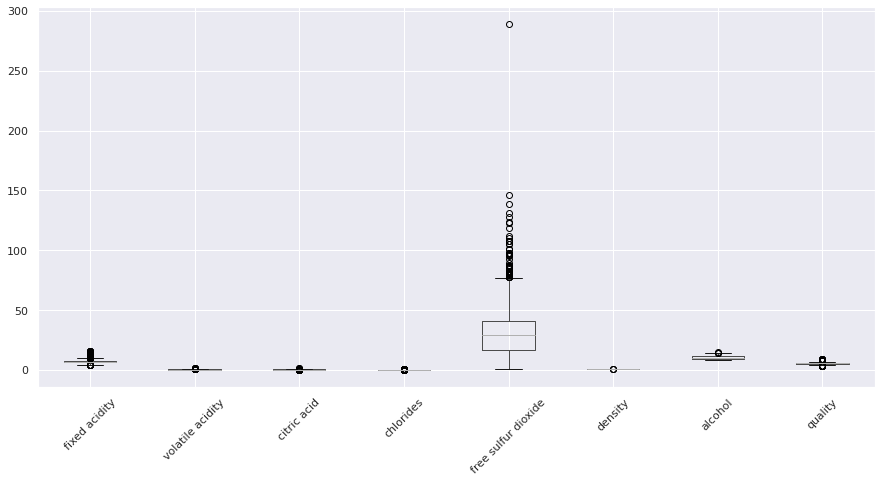

In [15]:
wines.boxplot(figsize=(15,7))
plt.xticks(rotation=45)
plt.show()

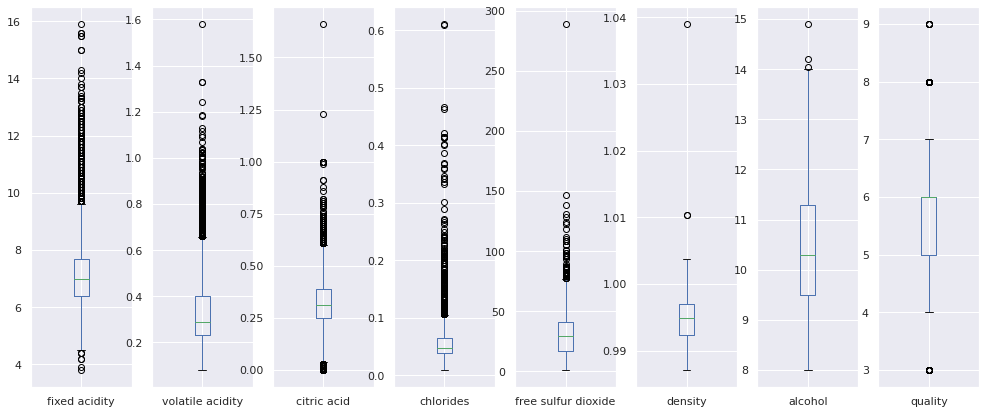

In [16]:
wines.plot(kind='box', subplots=True, grid=True, figsize=(17,7))
plt.show()

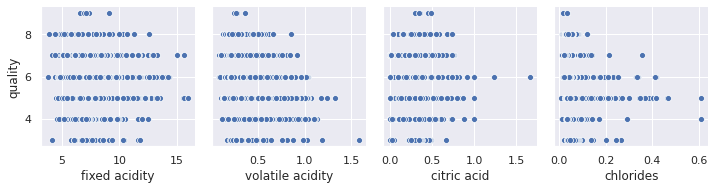

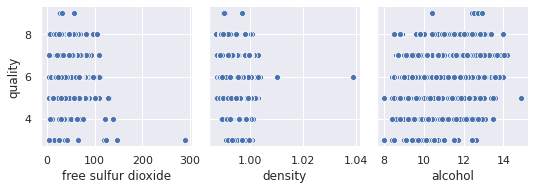

In [17]:
sns.pairplot(data=wines, 
             x_vars=['fixed acidity', 'volatile acidity', 'citric acid', 
                     'chlorides'],
             y_vars=['quality'])

sns.pairplot(data=wines, 
             x_vars=['free sulfur dioxide', 'density', 'alcohol'],
             y_vars=['quality'])


plt.show()

- finding best way to remove them

z_score

In [18]:
z = np.abs(stats.zscore(wines))
#threshold = 2.5
outliers_z = np.where(z > 2.5)
print(len(outliers_z[0]))

803


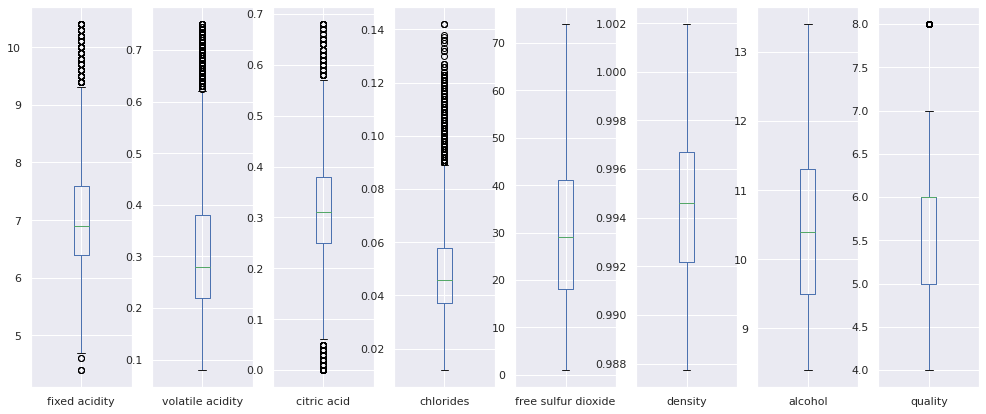

In [19]:
# wines[(z < 2.5).all(axis=1)].boxplot(figsize=(20,9))
wines[(z < 2.5).all(axis=1)].plot(kind='box', subplots=True, grid=True, figsize=(17,7))
plt.show()

iqr

In [20]:
Q1 = wines.quantile(0.25)
Q3 = wines.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

fixed acidity           1.30000
volatile acidity        0.17000
citric acid             0.14000
chlorides               0.02700
free sulfur dioxide    24.00000
density                 0.00465
alcohol                 1.80000
quality                 1.00000
dtype: float64


In [21]:
outliers_iqr = wines[((wines < (Q1 - 1.5 * IQR)) 
                      | (wines > (Q3 + 1.5 * IQR)))
                     .any(axis=1)]

outliers_iqr.shape

(1433, 8)

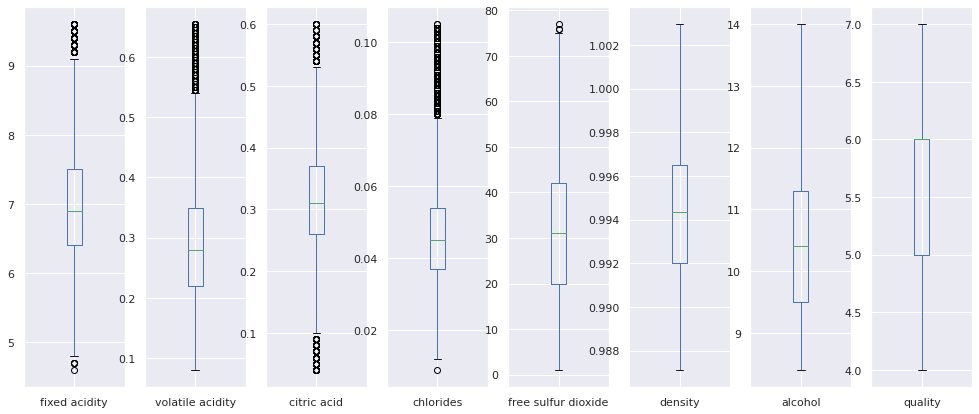

In [22]:
wines[~((wines < (Q1 - 1.5 * IQR)) 
        | (wines > (Q3 + 1.5 * IQR)))
      .any(axis=1)].plot(kind='box', subplots=True, grid=True, figsize=(17,7))

plt.show()

- lets remove through iqr score

In [23]:
wines = wines[~((wines < (Q1 - 1.5 * IQR)) | (wines > (Q3 + 1.5 * IQR)))
              .any(axis=1)]

In [35]:
wines.head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,density,alcohol,quality
6,7.9,0.60,0.06,0.069,15.0,0.9964,9.4,5
9,7.5,0.50,0.36,0.071,17.0,0.9978,10.5,5
10,6.7,0.58,0.08,0.097,15.0,0.9959,9.2,5
11,7.5,0.50,0.36,0.071,17.0,0.9978,10.5,5
16,8.5,0.28,0.56,0.092,35.0,0.9969,10.5,7


In [37]:
wines = wines.reset_index(drop=True)

In [38]:
wines.shape

(5064, 8)

## Split the dataframe

In [50]:
train = wines.drop('quality', axis=1)
target = wines['quality']

In [51]:
train.head(2)

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,density,alcohol
0,7.9,0.6,0.06,0.069,15.0,0.9964,9.4
1,7.5,0.5,0.36,0.071,17.0,0.9978,10.5


In [52]:
target.head(2)

0    5
1    5
Name: quality, dtype: int64

## Check the dataframes

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5064 entries, 0 to 5063
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fixed acidity        5064 non-null   float64
 1   volatile acidity     5064 non-null   float64
 2   citric acid          5064 non-null   float64
 3   chlorides            5064 non-null   float64
 4   free sulfur dioxide  5064 non-null   float64
 5   density              5064 non-null   float64
 6   alcohol              5064 non-null   float64
dtypes: float64(7)
memory usage: 277.1 KB


In [55]:
target.shape

(5064,)

# Modeling

In [116]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.model_selection import KFold, cross_val_score, cross_validate, cross_val_predict

## cross validation

In [56]:
k_fold = KFold(n_splits=100, shuffle=True, random_state=0)

## evaluating algorithms

- decision tree regressor

In [86]:
rg_dt = DecisionTreeRegressor()

In [62]:
y_pred_dt = cross_val_predict(rg_dt, train, target, cv=k_fold, n_jobs=1)

In [122]:
print('Mean Absolute Error (MAE): ')
print(mean_absolute_error(target, y_pred_dt))

print('Mean Squared Error (MSE): ')
print(mean_squared_error(target, y_pred_dt))

print('Root Mean Squared Error (RMSE):')
print(np.sqrt(mean_squared_error(target, y_pred_dt)))

print()

print('R-Squared: ')
print(r2_score(target, y_pred_dt))

Mean Absolute Error (MAE): 
0.4020537124802528
Mean Squared Error (MSE): 
0.5078988941548184
Root Mean Squared Error (RMSE):
0.7126702562579824

R-Squared: 
0.13692367544941464


- Linear Regression

In [87]:
rg_lr = LinearRegression()

In [84]:
y_pred_lr = cross_val_predict(rg_lr, train, target, cv=k_fold, n_jobs=1)

In [121]:
print('Mean Absolute Error (MAE): ')
print(mean_absolute_error(target, y_pred_lr))

print('Mean Squared Error (MSE): ')
print(mean_squared_error(target, y_pred_lr))

print('Root Mean Squared Error (RMSE):')
print(np.sqrt(mean_squared_error(target, y_pred_lr)))

print()

print('R-Squared: ')
print(r2_score(target, y_pred_lr))

Mean Absolute Error (MAE): 
0.5354358373119293
Mean Squared Error (MSE): 
0.4434602964686216
Root Mean Squared Error (RMSE):
0.6659281466259116

R-Squared: 
0.24642465820454496


## let's plot some predictions

- decision tree regressor

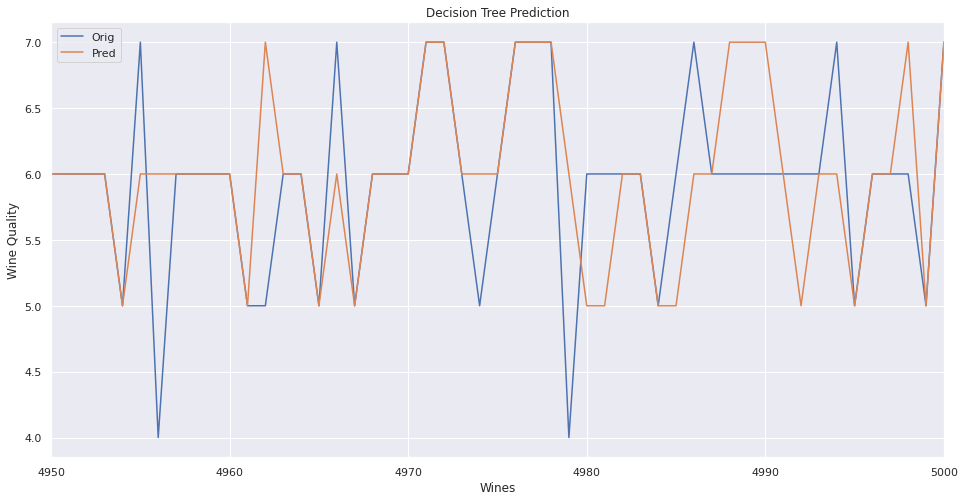

In [113]:
predictions = y_pred_dt

valid = wines.copy()
valid['predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Decision Tree Prediction')
plt.xlabel('Wines')
plt.ylabel('Wine Quality')

plt.plot(valid[['quality', 'predictions']])
plt.legend(['Orig', 'Pred'])
plt.xlim(4950,5000)
plt.show()

- linear regression

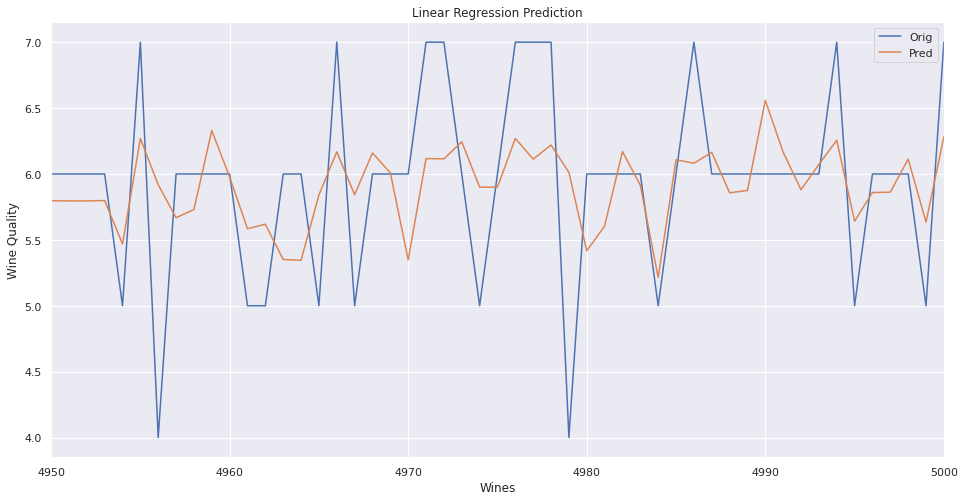

In [114]:
predictions = y_pred_lr

valid = wines.copy()
valid['predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Linear Regression Prediction')
plt.xlabel('Wines')
plt.ylabel('Wine Quality')

plt.plot(valid[['quality', 'predictions']])
plt.legend(['Orig', 'Pred'])
plt.xlim(4950,5000)
plt.show()

Through these plots we can see exactly what the MAE and MSE give to us. <br>
The two models worked similiar, but:
    - Decision Tree got more hits, however got worse errors.
    - Linear Regression got less hits than DT, however when it was wrong, the error was not large.